In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore
import seaborn as sns

In [37]:
df = pd.read_csv('data_science_salaries.csv')

In [38]:
# Remove employee residence column
df.drop(columns = ['employee_residence'], inplace = True)

In [39]:
# Filter data set so we only see United States for company location
df_us = df[df['company_location'] == 'United States']

In [40]:
df_us['company_location'].nunique()

1

In [41]:
missing_values = df.isnull().sum()
print(missing_values)

job_title           0
experience_level    0
employment_type     0
work_models         0
work_year           0
salary              0
salary_currency     0
salary_in_usd       0
company_location    0
company_size        0
dtype: int64


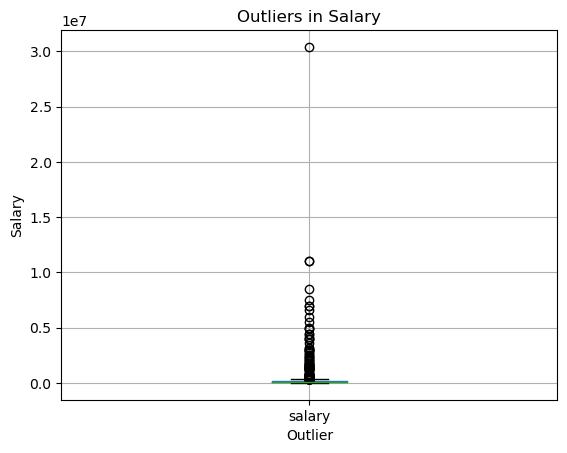

In [42]:
# Look for outliers
# Boxplot to visualize outliers
df.boxplot(column = 'salary')
plt.title('Outliers in Salary')
plt.suptitle('')
plt.xlabel('Outlier')
plt.ylabel('Salary')
plt.show()

In [43]:
Q1 = df['salary'].quantile(0.2)
Q3 = df['salary'].quantile(0.8)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_us[(df_us['salary'] < lower_bound) | (df_us['salary'] > upper_bound)]
outliers = outliers[['job_title','experience_level','work_models','salary']]
outliers.sort_values(by = 'salary', ascending = False, inplace = True)
print(f"lower {lower_bound}, upper {upper_bound}")
display(outliers)

lower -87500.0, upper 372500.0


,job_title,experience_level,work_models,salary
6353,BI Data Analyst,Mid-level,Hybrid,11000000
6381,Data Science Manager,Senior-level,Hybrid,4000000
5289,Data Scientist,Mid-level,Remote,2500000
1611,Data Scientist,Senior-level,On-site,750000
1540,Data Engineer,Mid-level,On-site,750000
296,Machine Learning Scientist,Mid-level,On-site,750000
848,Machine Learning Scientist,Mid-level,On-site,750000
852,Machine Learning Engineer,Mid-level,On-site,750000
329,Research Scientist,Mid-level,On-site,720000
321,Research Engineer,Mid-level,On-site,720000


In [44]:
df_us.plot.scatter(x = 'work_models', y = 'salary')

<Axes: xlabel='work_models', ylabel='salary'>

In [45]:
# Understand data types and non-null counts
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6599 entries, 0 to 6598
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   job_title         6599 non-null   object
 1   experience_level  6599 non-null   object
 2   employment_type   6599 non-null   object
 3   work_models       6599 non-null   object
 4   work_year         6599 non-null   int64 
 5   salary            6599 non-null   int64 
 6   salary_currency   6599 non-null   object
 7   salary_in_usd     6599 non-null   int64 
 8   company_location  6599 non-null   object
 9   company_size      6599 non-null   object
dtypes: int64(3), object(7)
memory usage: 515.7+ KB
None


In [46]:
# Summary statistics for numeric columns
print(df.describe())

         work_year        salary  salary_in_usd
count  6599.000000  6.599000e+03    6599.000000
mean   2022.818457  1.792833e+05  145560.558569
std       0.674809  5.263722e+05   70946.838070
min    2020.000000  1.400000e+04   15000.000000
25%    2023.000000  9.600000e+04   95000.000000
50%    2023.000000  1.400000e+05  138666.000000
75%    2023.000000  1.875000e+05  185000.000000
max    2024.000000  3.040000e+07  750000.000000


In [47]:
# Check unique values for experience_level
print(df['experience_level'].value_counts())

experience_level
Senior-level       4105
Mid-level          1675
Entry-level         565
Executive-level     254
Name: count, dtype: int64


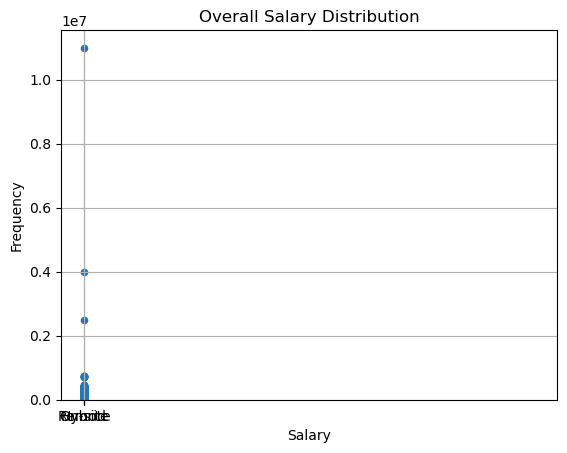

In [48]:
# Visualize Overall Salary Distribution

# Histogram
df['salary'].hist(bins = 30)
plt.title('Overall Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

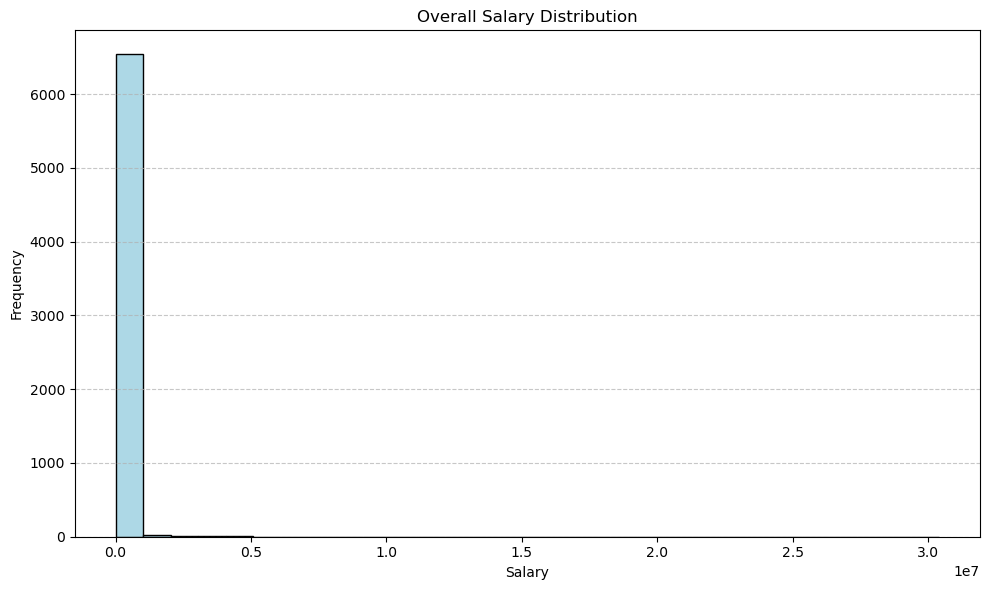

In [49]:
# Plot histogram for salary distribution
plt.figure(figsize = (10, 6))
plt.hist(df['salary'], bins = 30, color = 'lightblue', edgecolor = 'black')
plt.title('Overall Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)

# Show plot
plt.tight_layout()
plt.show()

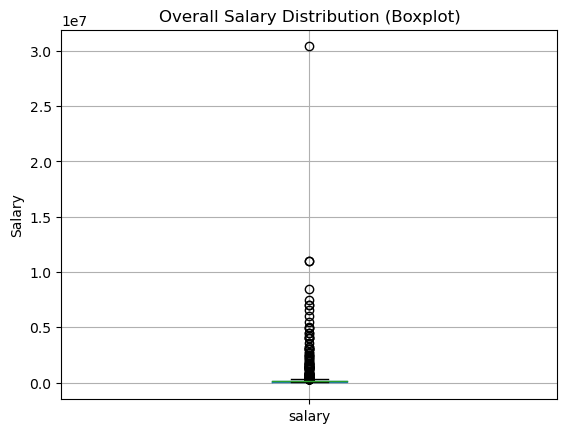

In [50]:
# Boxplot of salary distribution
df.boxplot(column = 'salary')
plt.title('Overall Salary Distribution (Boxplot)')
plt.ylabel('Salary')
plt.show()

In [51]:
# Analyze Salary by Experience Level
# Calculate summary statistics
experience_salary = df.groupby('experience_level')['salary'].describe()
print(experience_salary)

                   count           mean            std      min       25%  \
experience_level                                                            
Entry-level        565.0  162796.054867  530557.685605  14000.0   50000.0   
Executive-level    254.0  215203.681102  375316.845869  15000.0  137000.0   
Mid-level         1675.0  191858.816716  915254.963537  15000.0   73100.0   
Senior-level      4105.0  174198.581973  237014.263156  24000.0  119000.0   

                       50%       75%         max  
experience_level                                  
Entry-level        80000.0  119200.0   6600000.0  
Executive-level   183580.0  230000.0   6000000.0  
Mid-level         109238.0  152487.5  30400000.0  
Senior-level      154600.0  200000.0   7500000.0  


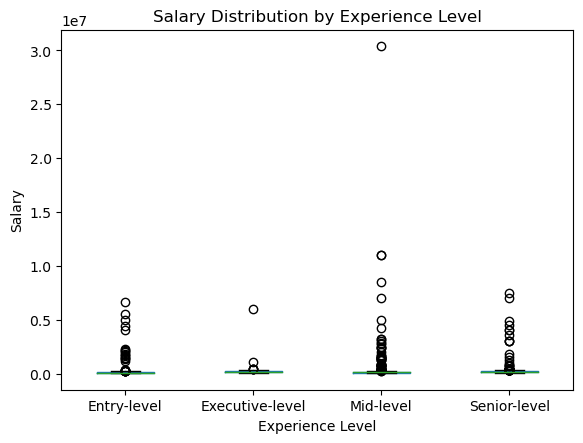

In [52]:
# Visualize Salary by Experience Level
df.boxplot(column = 'salary', by = 'experience_level', grid = False)
plt.title('Salary Distribution by Experience Level')
plt.suptitle('')
plt.xlabel('Experience Level')
plt.ylabel('Salary')
plt.show()

In [53]:
# Analyze salary by work models
# Calculate mean/median salaries by work models
worktype_salary = df.groupby('work_models')['salary'].median()
print(worktype_salary)

work_models
Hybrid      88000.0
On-site    142200.0
Remote     138750.0
Name: salary, dtype: float64


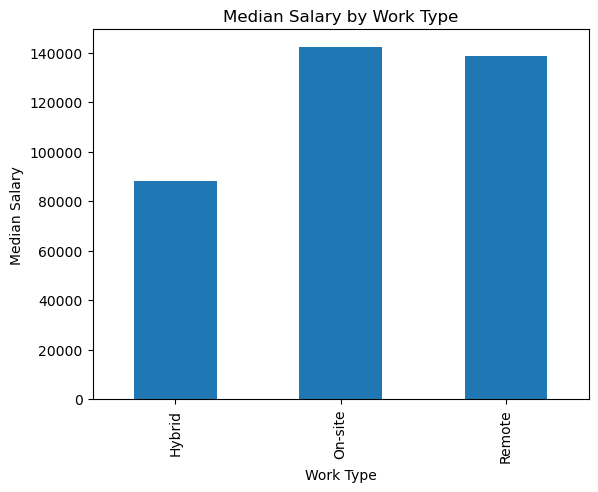

In [54]:
# Bar plot for median salaries by work type
worktype_salary.plot(kind = 'bar')
plt.title('Median Salary by Work Type')
plt.xlabel('Work Type')
plt.ylabel('Median Salary')
plt.show()

In [55]:
# Analyze salary by Company Size
# Calculate summary statistics
company_size_salary = df.groupby('company_size')['salary'].mean()
print(company_size_salary)

company_size
Large     409937.574692
Medium    153820.125597
Small     284998.747059
Name: salary, dtype: float64


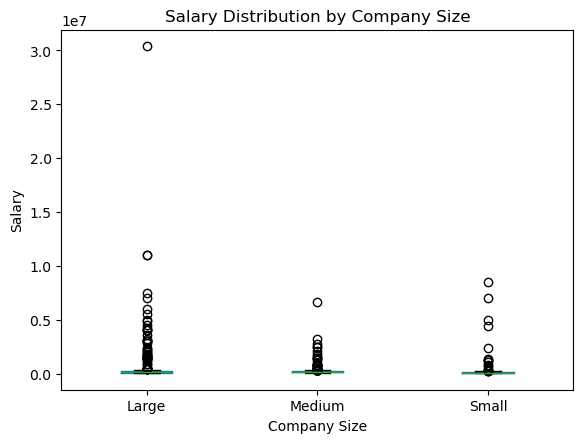

In [56]:
# Boxplot for salary distribution by company size
df.boxplot(column = 'salary', by = 'company_size', grid = False)
plt.title('Salary Distribution by Company Size')
plt.suptitle('')
plt.xlabel('Company Size')
plt.ylabel('Salary')
plt.show()

In [57]:
# Pivot table for mean salary by experience level and company size
pivot_table = df.pivot_table(values = 'salary', 
                             index = 'experience_level', 
                             columns = 'company_size', 
                             aggfunc = 'mean')
print(pivot_table)

company_size              Large         Medium          Small
experience_level                                             
Entry-level       250326.260870  121889.827930  292131.224490
Executive-level   484725.000000  188673.606195  290875.000000
Mid-level         603529.353591  131668.189944  380255.758065
Senior-level      338077.656126  163461.992107  161421.568627


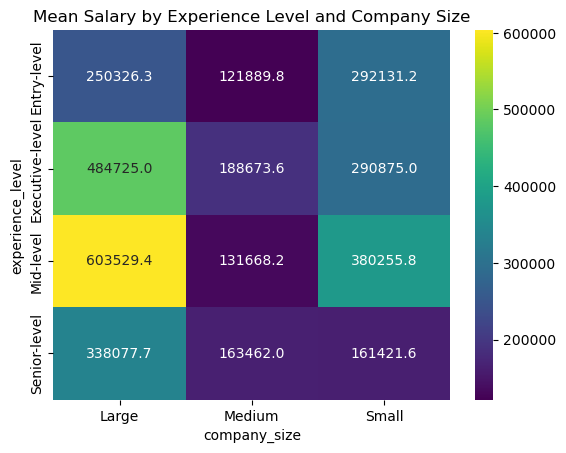

In [58]:
# Heatmap for visualization
sns.heatmap(pivot_table, annot = True, fmt = '.1f', cmap = 'viridis')
plt.title('Mean Salary by Experience Level and Company Size')
plt.show()

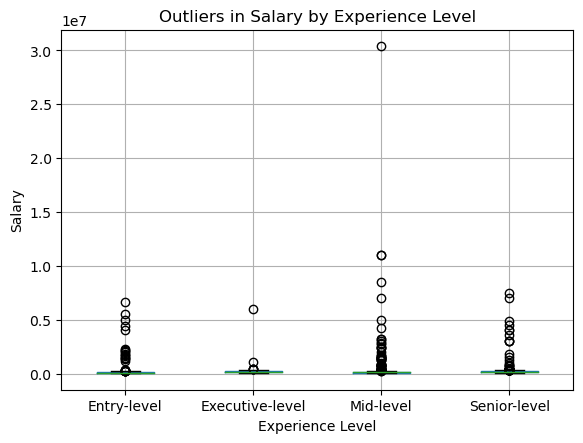

In [59]:
# Detect outliers
# Boxplot to visualize outliers
df.boxplot(column = 'salary', by = 'experience_level')
plt.title('Outliers in Salary by Experience Level')
plt.suptitle('')
plt.xlabel('Experience Level')
plt.ylabel('Salary')
plt.show()

In [60]:
# Correlation between work_models and salary, and company_size and salary
data = {
    'work_models': ['Remote', 'Onsite', 'Hybrid'],
    'company_size': ['Small', 'Medium', 'Large'],
    'salary': [70000, 80000, 90000]
}

df_data = pd.DataFrame(data)
df_encoded = pd.get_dummies(df_data, columns = ['work_models', 'company_size'])
numeric_df = df_encoded.select_dtypes(include = [np.number])

correlation_matrix = numeric_df.corr()
salary_correlation = correlation_matrix['salary']

print("Correlation with Salary:")
print(salary_correlation)

Correlation with Salary:
salary    1.0
Name: salary, dtype: float64


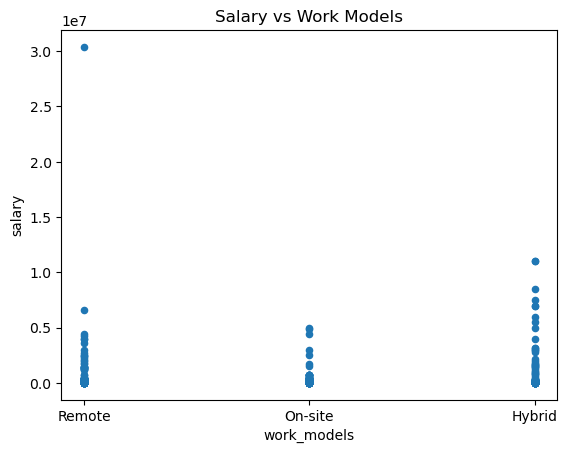

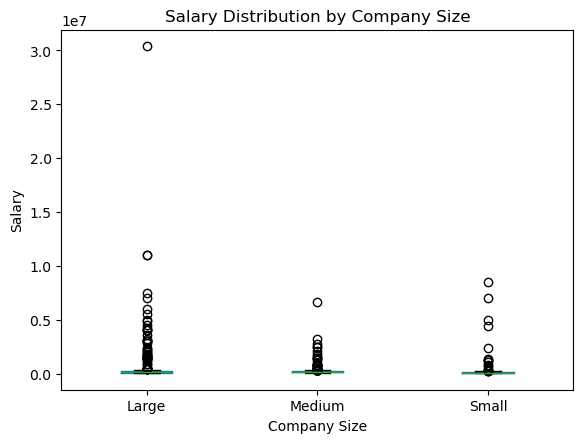

In [61]:
df.plot.scatter(x = 'work_models', 
                y = 'salary', 
                title = 'Salary vs Work Models')

df.boxplot(column = 'salary', by = 'company_size', grid = False)
plt.title('Salary Distribution by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Salary')
plt.suptitle('')
plt.show()

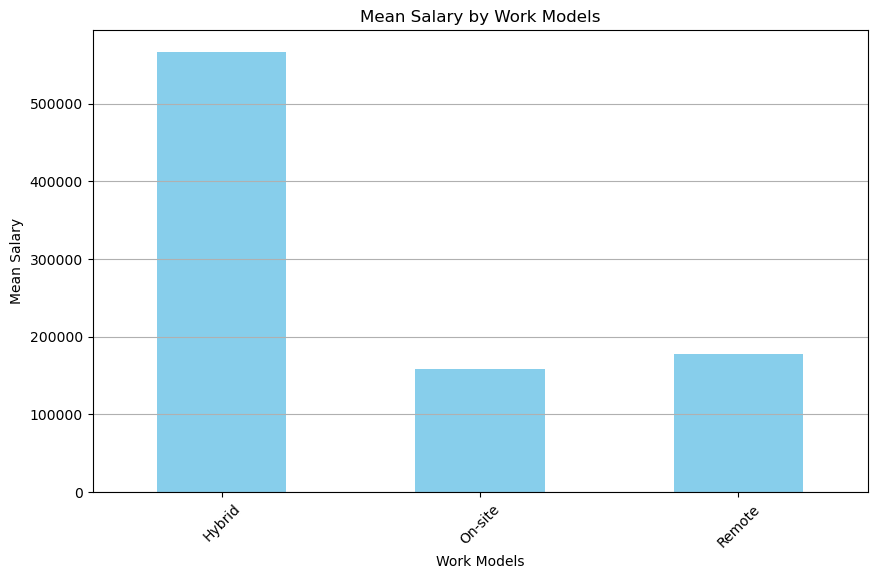

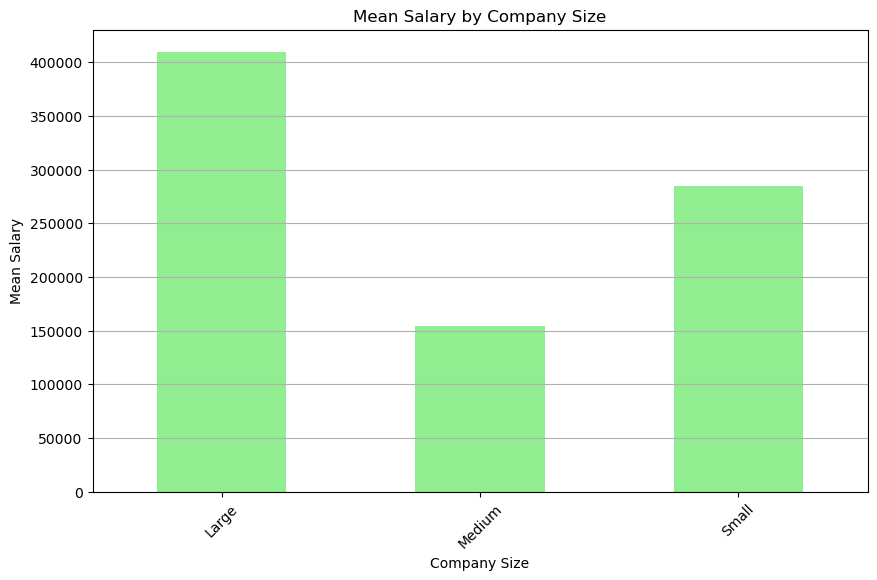

In [62]:
mean_salary_by_work_models = df.groupby('work_models')['salary'].mean()

plt.figure(figsize = (10, 6))
mean_salary_by_work_models.plot(kind = 'bar', color = 'skyblue')
plt.title('Mean Salary by Work Models')
plt.xlabel('Work Models')
plt.ylabel('Mean Salary')
plt.xticks(rotation = 45)
plt.grid(axis = 'y')
plt.show()

mean_salary_by_company_size = df.groupby('company_size')['salary'].mean()

plt.figure(figsize = (10, 6))
mean_salary_by_company_size.plot(kind = 'bar', color = 'lightgreen')
plt.title('Mean Salary by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Mean Salary')
plt.xticks(rotation = 45)
plt.grid(axis='y')
plt.show()

job_title
Principal Data Architect              3.000000e+06
Head of Machine Learning              2.172667e+06
Lead Machine Learning Engineer        1.940250e+06
AI Programmer                         8.868010e+05
Lead Data Scientist                   8.392368e+05
BI Data Analyst                       7.155882e+05
Lead Data Analyst                     6.550000e+05
Head of Data Science                  5.846304e+05
Applied Machine Learning Scientist    5.548429e+05
Data Integration Specialist           4.649562e+05
Name: salary, dtype: float64


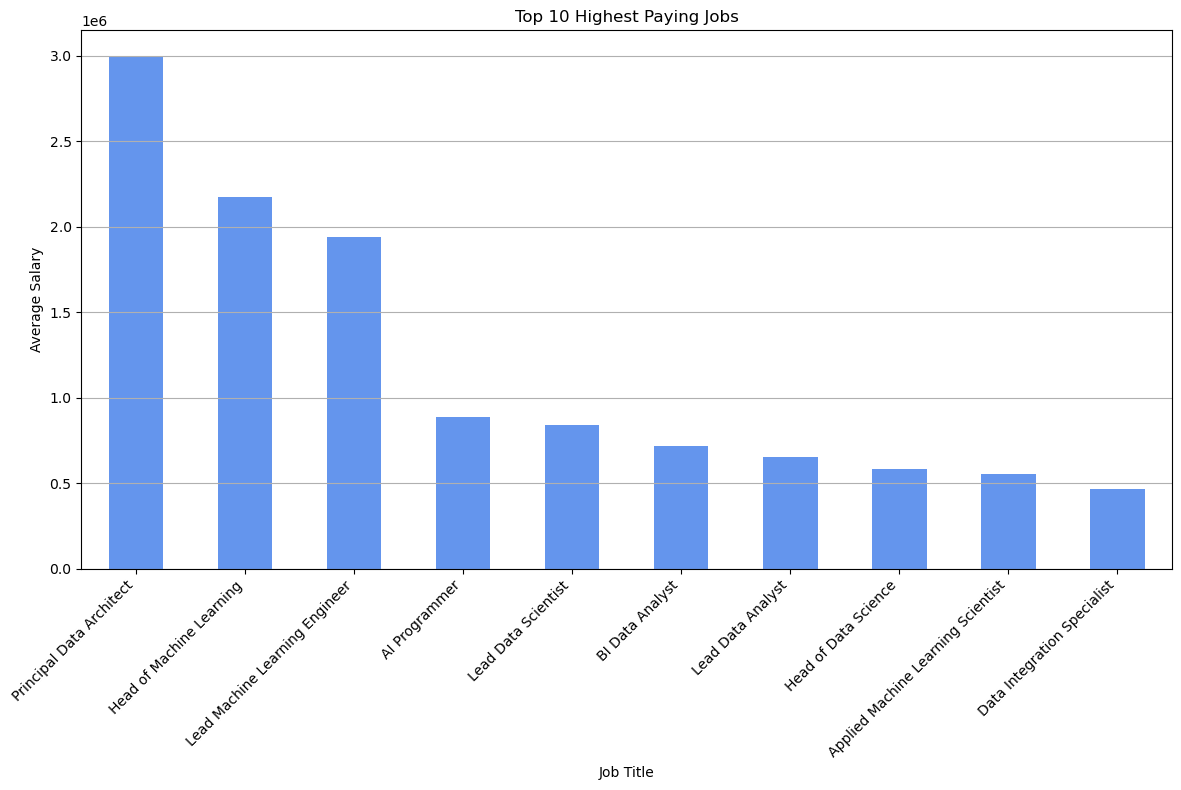

In [63]:
mean_salary_by_job = df.groupby('job_title')['salary'].mean()

# Sort jobs by mean salary in descending order
sorted_salary_by_job = mean_salary_by_job.sort_values(ascending=False)

# Display the top N jobs with the highest salaries
top_n_jobs = sorted_salary_by_job.head(10)
print(top_n_jobs)

# Plot a bar chart for the top N jobs with the highest salaries
plt.figure(figsize = (12, 8))
top_n_jobs.plot(kind = 'bar', color = 'cornflowerblue')
plt.title('Top 10 Highest Paying Jobs')
plt.xlabel('Job Title')
plt.ylabel('Average Salary')
plt.xticks(rotation = 45, ha = 'right')
plt.grid(axis = 'y')

# Show plot
plt.tight_layout()
plt.show()